# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Adrian Putra Ramadhan
- Email: adrianramadhan881@gmail.com
- Id Dicoding: adrian_ramadhan

## Persiapan

### Menyiapkan library yang dibutuhkan

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib

### Menyiapkan data yang akan diguankan

## Data Understanding

In [23]:
# Menyiapkan data
file_path = './employee_data.csv'
df = pd.read_csv(file_path)

In [32]:
# Menampilkan informasi awal tentang data
print("Shape:", df.shape)

Shape: (1470, 35)


In [33]:
print("\nInfo:")
print(df.info())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  J

In [34]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBala

In [35]:
print("\nDescriptive statistics:")
print(df.describe())


Descriptive statistics:
        EmployeeId          Age    Attrition    DailyRate  DistanceFromHome  \
count  1470.000000  1470.000000  1058.000000  1470.000000       1470.000000   
mean    735.500000    36.923810     0.169187   802.485714          9.192517   
std     424.496761     9.135373     0.375094   403.509100          8.106864   
min       1.000000    18.000000     0.000000   102.000000          1.000000   
25%     368.250000    30.000000     0.000000   465.000000          2.000000   
50%     735.500000    36.000000     0.000000   802.000000          7.000000   
75%    1102.750000    43.000000     0.000000  1157.000000         14.000000   
max    1470.000000    60.000000     1.000000  1499.000000         29.000000   

         Education  EmployeeCount  EnvironmentSatisfaction   HourlyRate  \
count  1470.000000         1470.0              1470.000000  1470.000000   
mean      2.912925            1.0                 2.721769    65.891156   
std       1.024165            0.0     

<Figure size 1200x800 with 0 Axes>

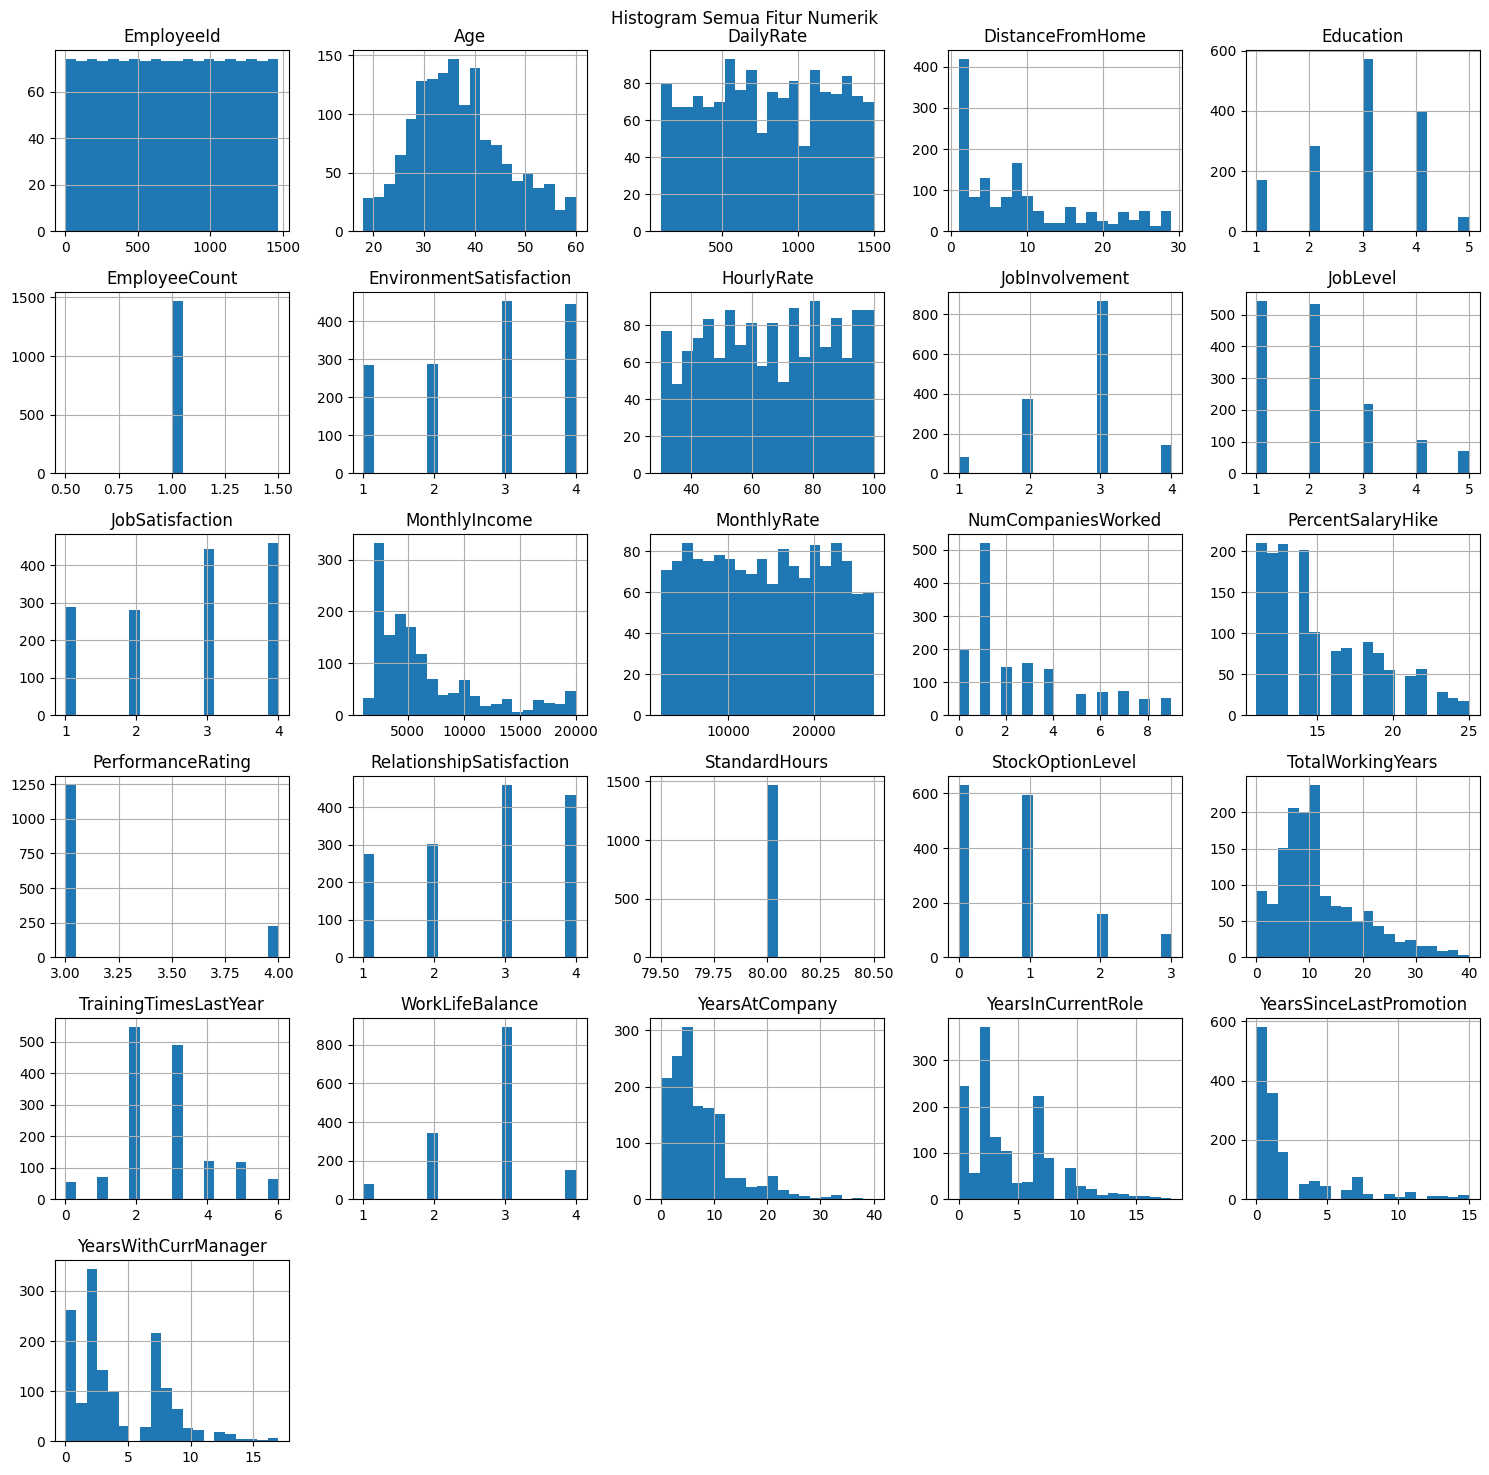

In [58]:
# Distribusi data numerik
num_cols = df.select_dtypes(include=[np.number]).columns.drop('Attrition')
plt.figure(figsize=(12, 8))
df[num_cols].hist(bins=20, layout=(6, 5), figsize=(15,15))
plt.suptitle("Histogram Semua Fitur Numerik")
plt.tight_layout()
plt.show()

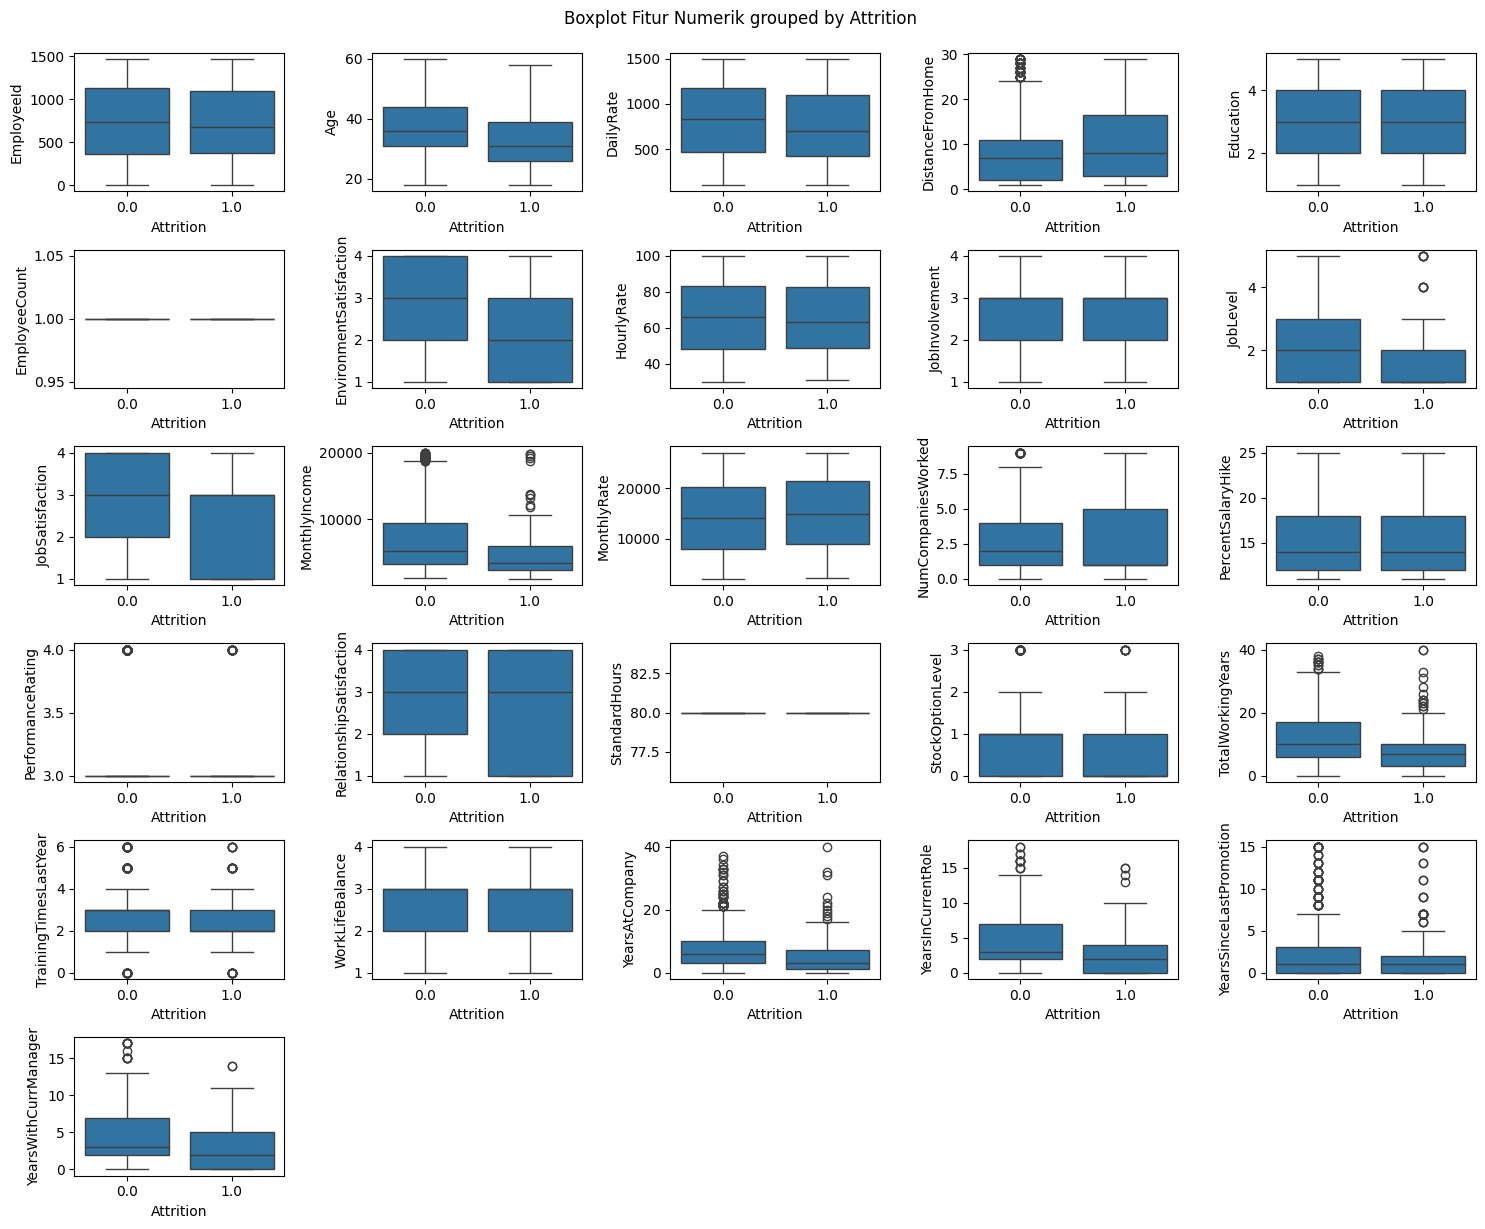

In [45]:
# Boxplot numeric vs Attrition
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(6, 5, i)
    sns.boxplot(x='Attrition', y=col, data=df)
    plt.tight_layout()
plt.suptitle("Boxplot Fitur Numerik grouped by Attrition", y=1.02)
plt.show()

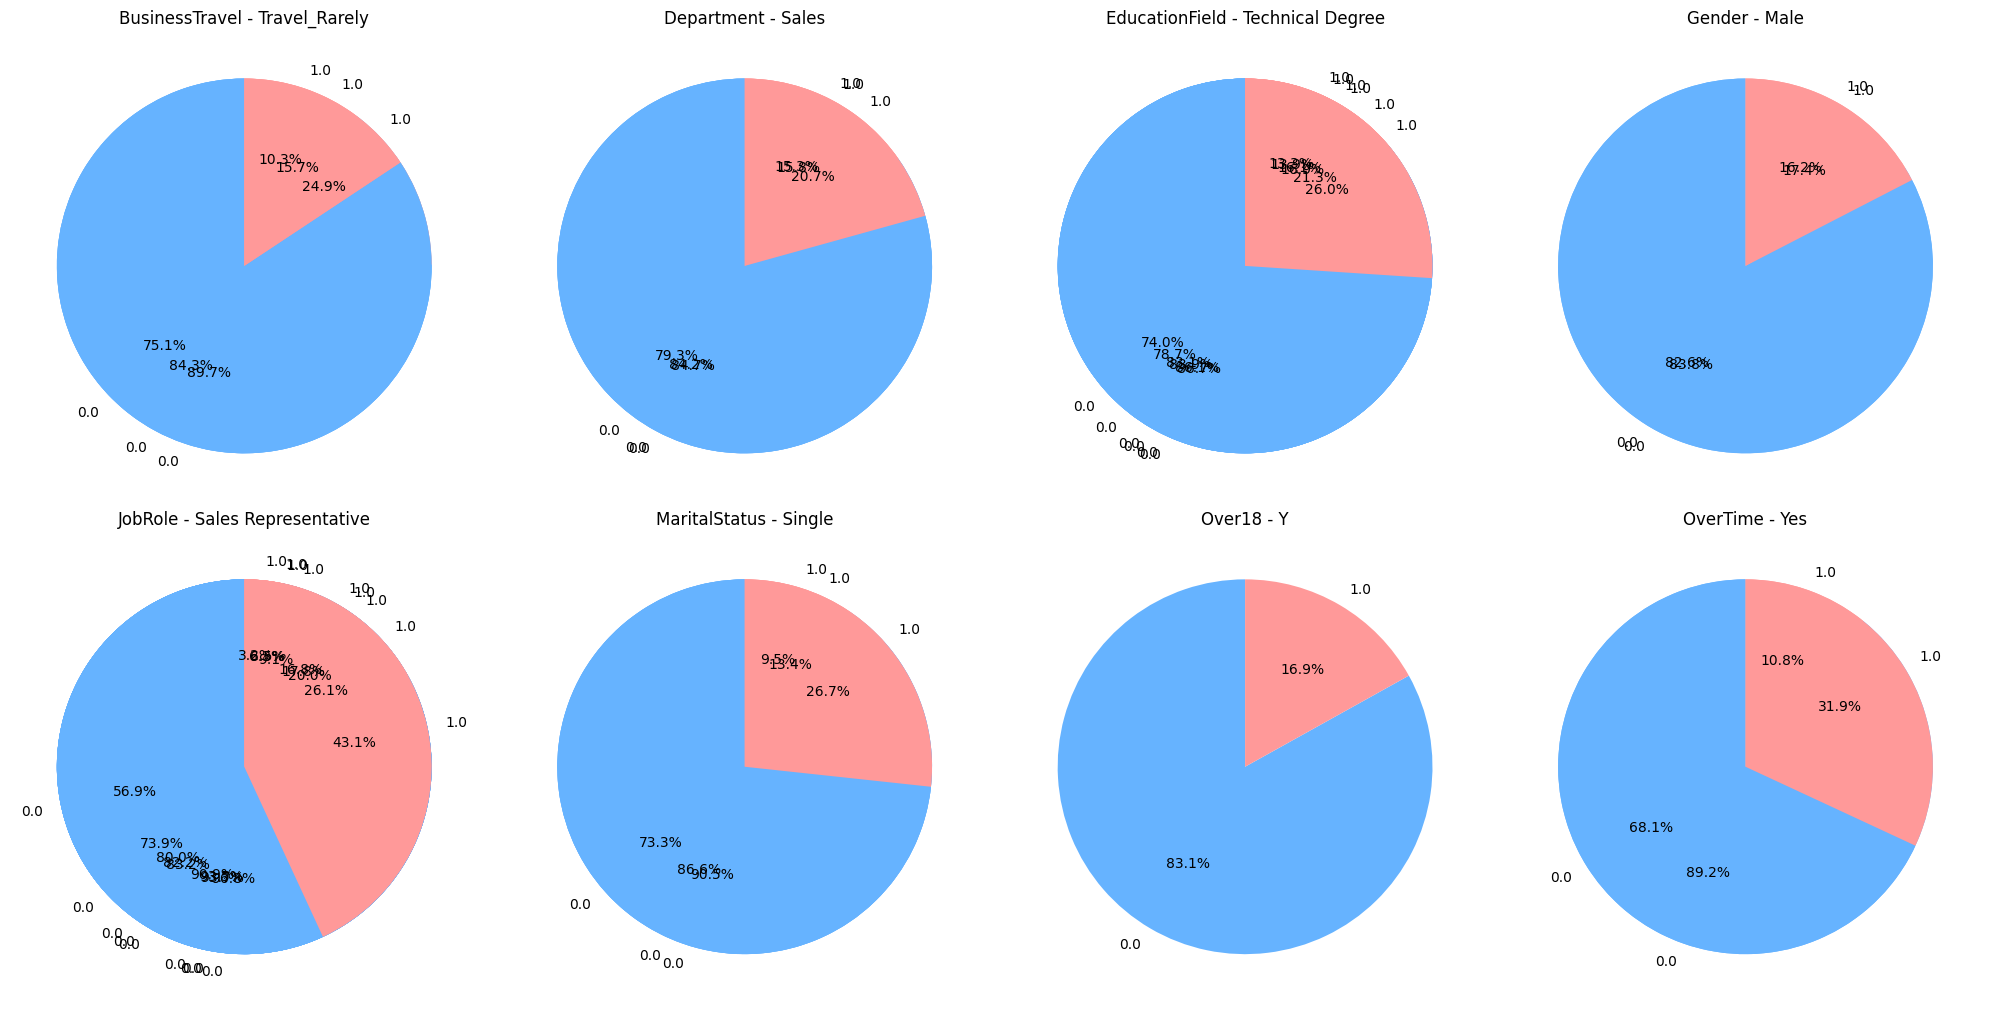

In [51]:
# Membuat diagram pie untuk proporsi Attrition dengan maksimal 4 diagram per baris
cat_cols = df.select_dtypes(include=['object']).columns
num_plots = len(cat_cols)
plots_per_row = 4
rows = (num_plots + plots_per_row - 1) // plots_per_row

fig, axes = plt.subplots(rows, plots_per_row, figsize=(20, rows * 5), constrained_layout=True)
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    prop = pd.crosstab(df[col], df['Attrition'], normalize='index') * 100
    for category in prop.index:
        axes[i].pie(
            prop.loc[category],
            labels=prop.columns,
            autopct='%1.1f%%',
            startangle=90,
            colors=['#66b3ff', '#ff9999']
        )
        axes[i].set_title(f"{col} - {category}")

# Menonaktifkan sumbu kosong jika jumlah plot kurang dari jumlah subplot
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.show()

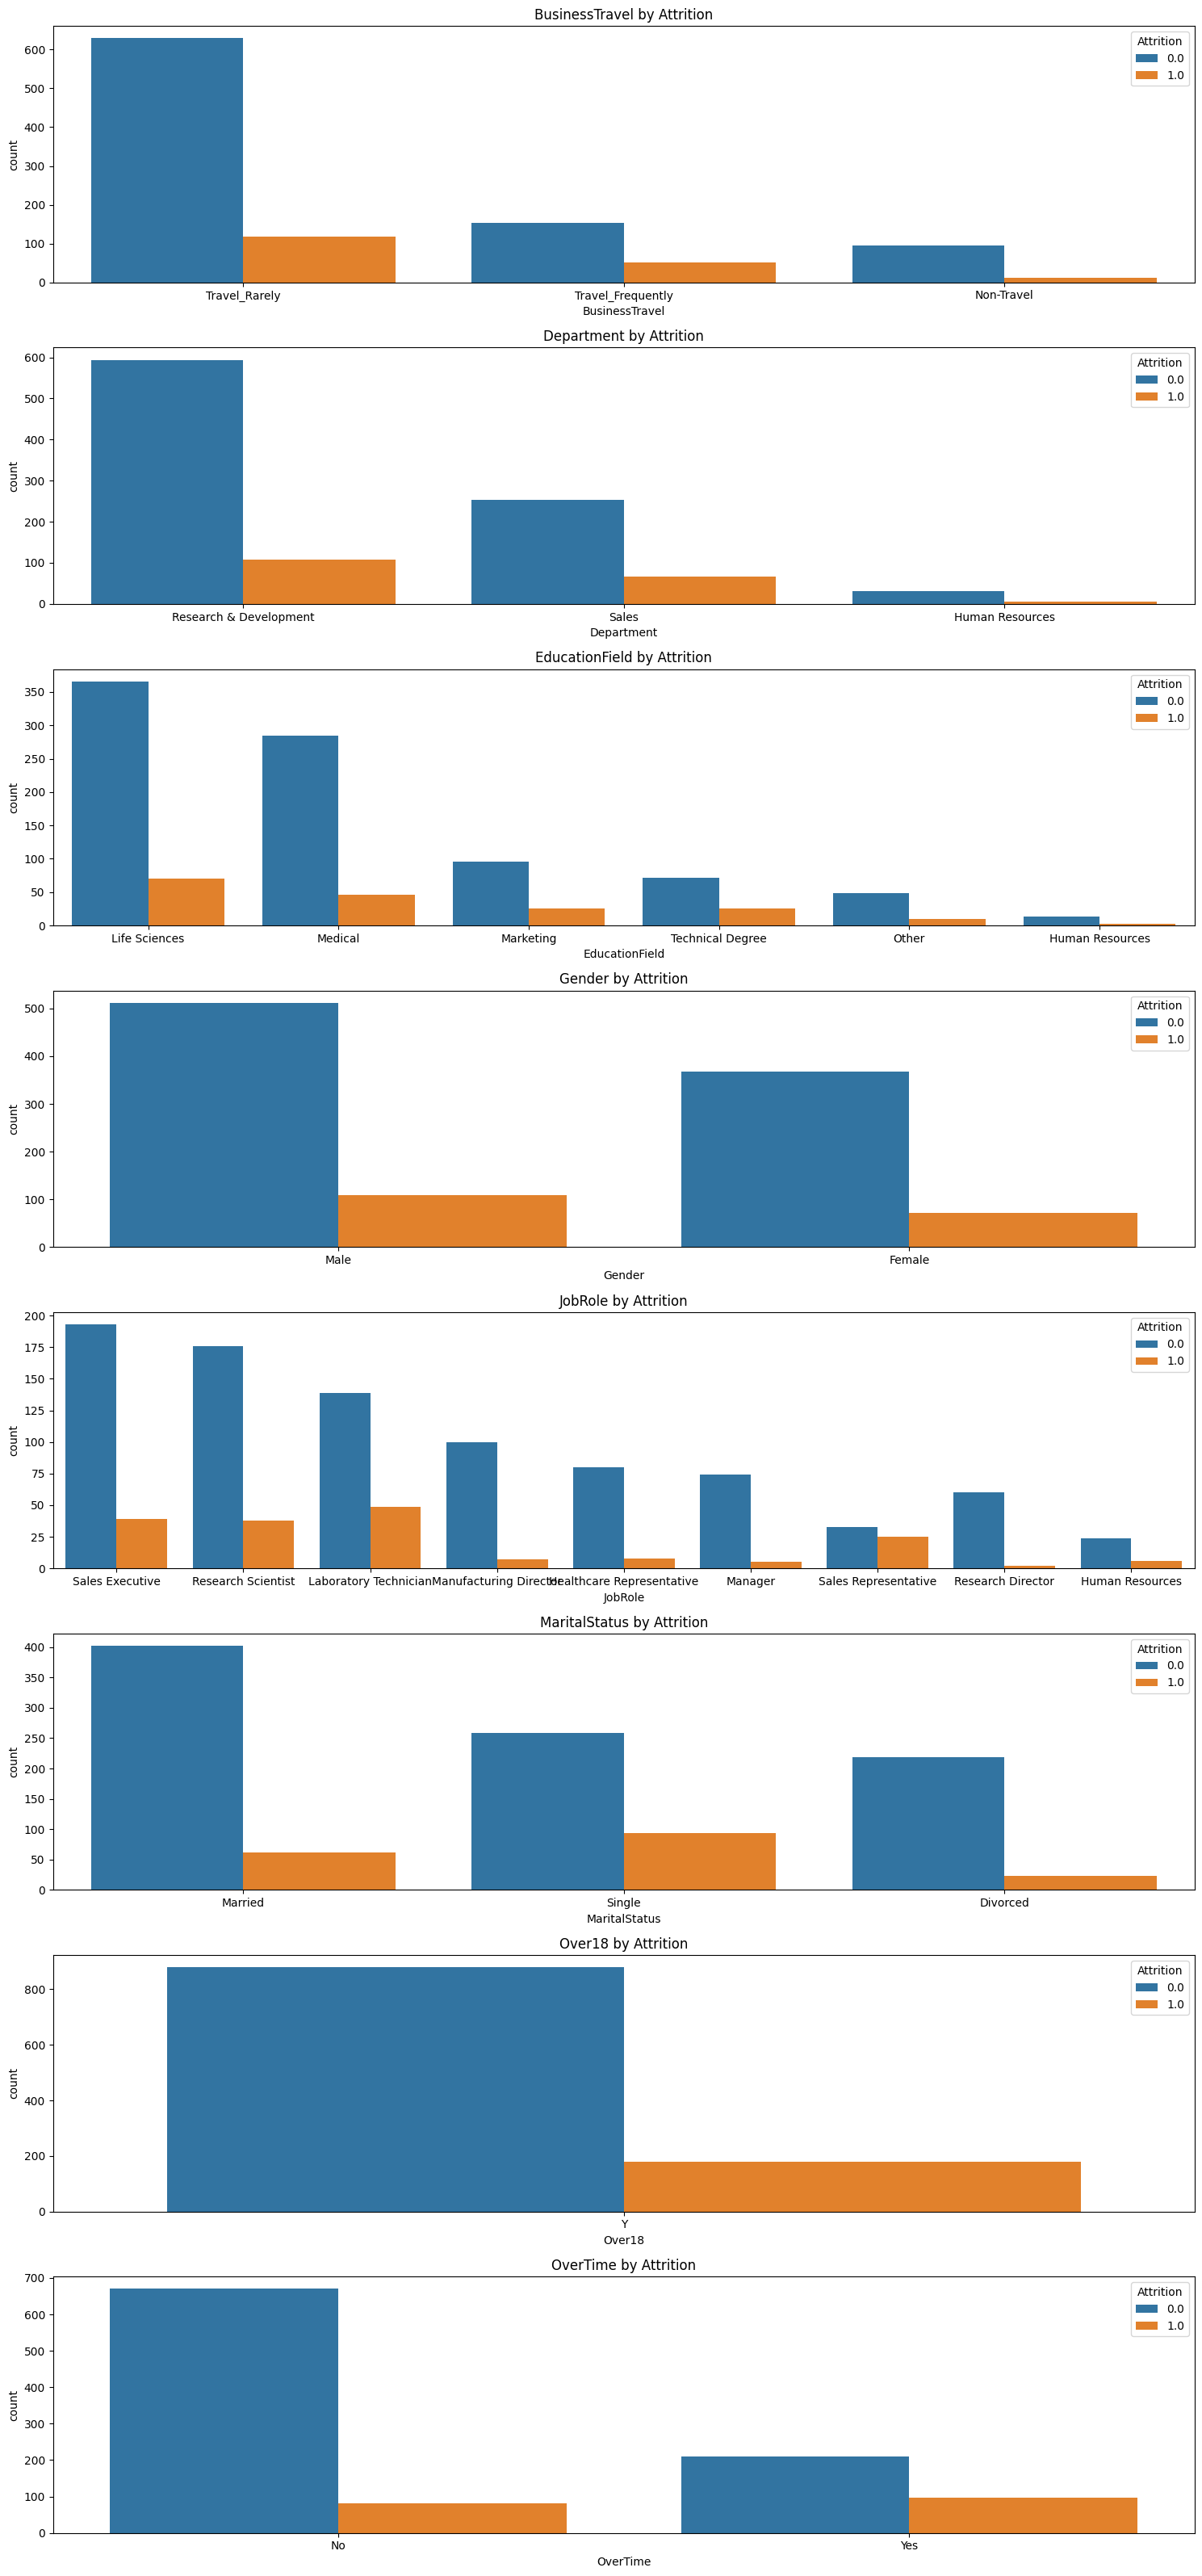

In [52]:
# Barplot count dan % Attrition per kategori
plt.figure(figsize=(15, len(cat_cols)*4))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols), 1, i)
    order = df[col].value_counts().index
    sns.countplot(x=col, hue='Attrition', data=df, order=order)
    plt.title(f"{col} by Attrition")
    plt.legend(title='Attrition')
    plt.tight_layout()
plt.show()

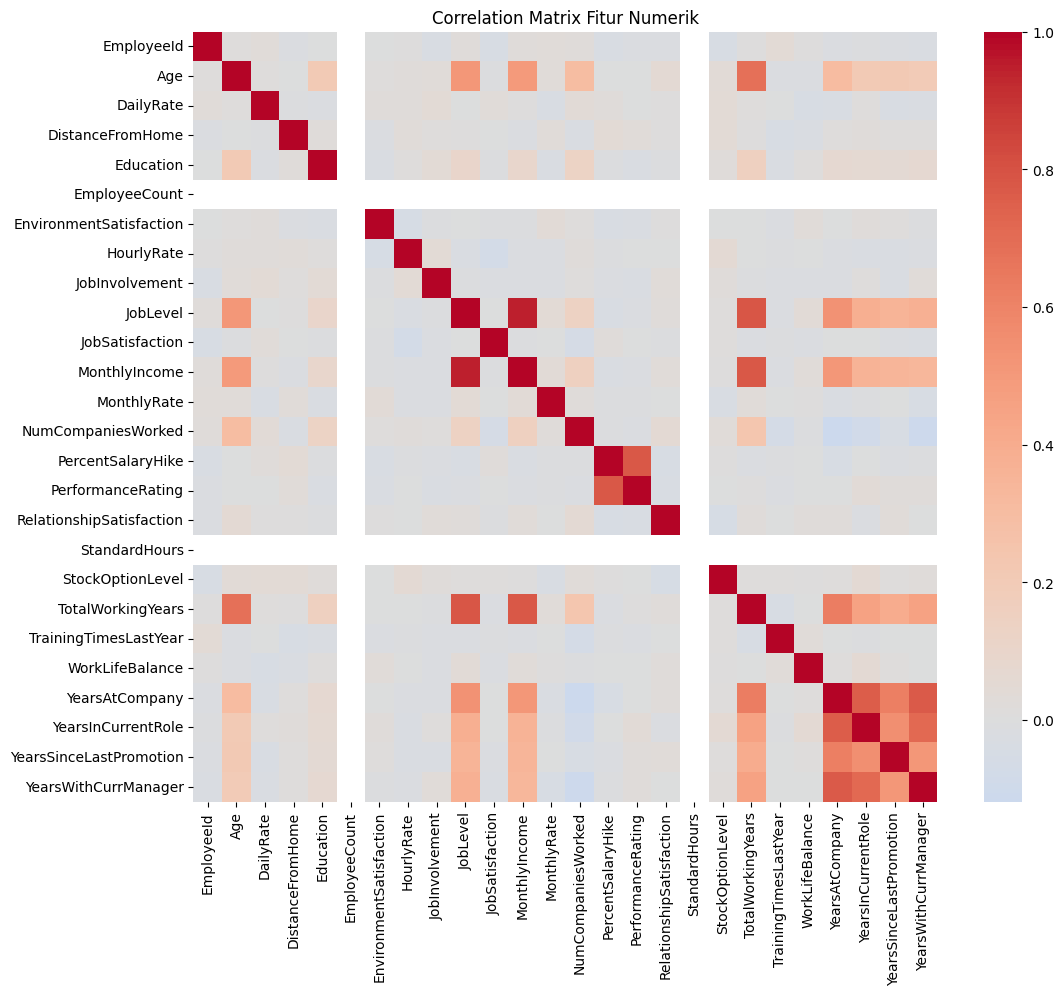

In [59]:
# Korelasi numerik
corr = df[num_cols].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Matrix Fitur Numerik")
plt.show()

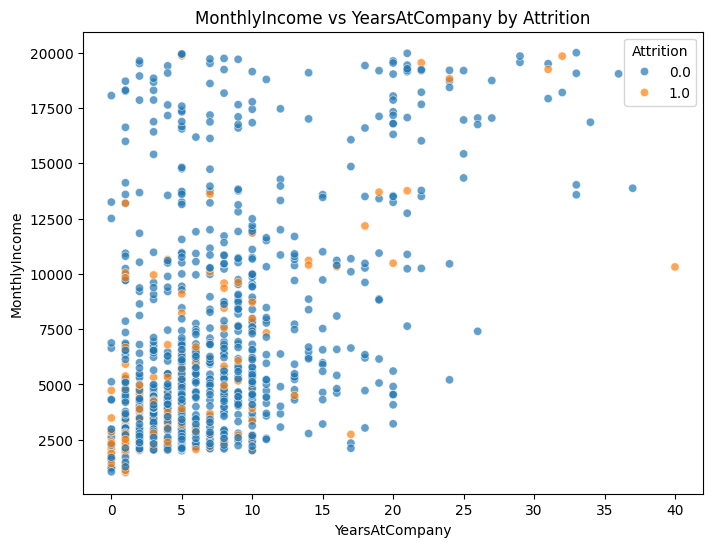

In [60]:
# Analisis multi-variate contoh: MonthlyIncome vs YearsAtCompany colored by Attrition
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='YearsAtCompany', y='MonthlyIncome', hue='Attrition', alpha=0.7)
plt.title("MonthlyIncome vs YearsAtCompany by Attrition")
plt.show()

## Data Preparation / Preprocessing

In [26]:
# Data Preparation / Preprocessing
df_clean = df.dropna()
le = LabelEncoder()

df_clean.isnull().sum()

EmployeeId                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [27]:
for col in df_clean.select_dtypes(include=['object']).columns:
    df_clean[col] = le.fit_transform(df_clean[col])

C:\Users\asus\AppData\Local\Temp\ipykernel_16300\2191370239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = le.fit_transform(df_clean[col])
C:\Users\asus\AppData\Local\Temp\ipykernel_16300\2191370239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = le.fit_transform(df_clean[col])
C:\Users\asus\AppData\Local\Temp\ipykernel_16300\2191370239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [28]:
X = df_clean.drop('Attrition', axis=1)
y = df_clean['Attrition']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [29]:
scaler = StandardScaler()
numeric_feats = X.select_dtypes(include=[np.number]).columns
X_train[numeric_feats] = scaler.fit_transform(X_train[numeric_feats])
X_test[numeric_feats] = scaler.transform(X_test[numeric_feats])

## Modeling

In [30]:
# Modeling
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluation

In [31]:
for name, model in [('Logistic Regression', lr), ('Random Forest', rf)]:
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    print(f"=== {name} ===")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_proba))
    print()

=== Logistic Regression ===
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91       176
         1.0       0.60      0.42      0.49        36

    accuracy                           0.85       212
   macro avg       0.74      0.68      0.70       212
weighted avg       0.84      0.85      0.84       212

Confusion Matrix:
 [[166  10]
 [ 21  15]]
ROC AUC: 0.8120265151515152

=== Random Forest ===
              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91       176
         1.0       0.67      0.06      0.10        36

    accuracy                           0.83       212
   macro avg       0.75      0.52      0.51       212
weighted avg       0.81      0.83      0.77       212

Confusion Matrix:
 [[175   1]
 [ 34   2]]
ROC AUC: 0.7925347222222222

